In [19]:
import matplotlib.pyplot as plt
import glob
import json

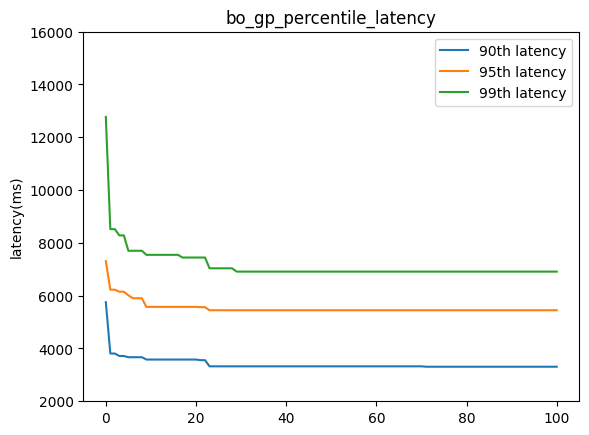

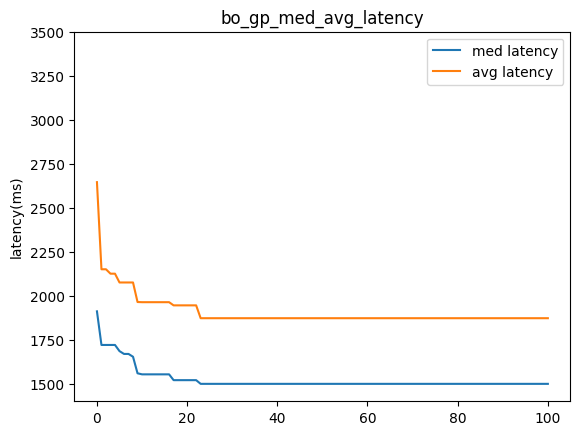

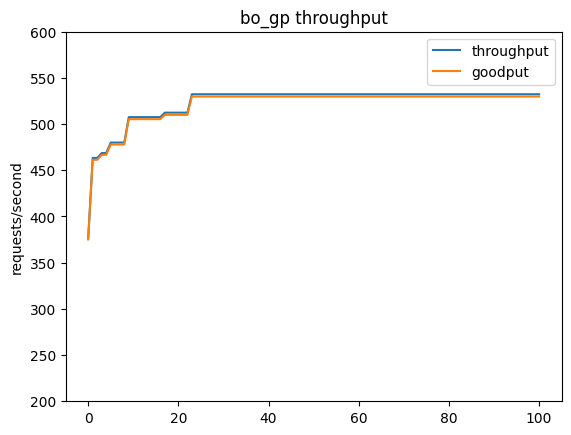

In [64]:
directory = f"/home/zhenyu/MLforDB/cybernetics/bo_gp/*.summary.json"
def plot(directory,title):
    metrics_files = glob.glob(directory)
    metrics_files = sorted(metrics_files)

    max_latency = []
    med_latency = []
    min_latency = []
    per_25_lantency = []
    per_90_lantency = []
    per_95_lantency = []
    per_99_lantency = []
    per_75_lantency = []
    avg_latency = []
    throughput = []
    goodput = []

    first = True
    for file_name in metrics_files:
        with open(file_name,'r') as f:
            json_data = f.read()
        data_dict = json.loads(json_data)
        if first:
            #max_latency.append(data_dict["Latency Distribution"]["Maximum Latency (microseconds)"])
            med_latency.append(data_dict["Latency Distribution"]["Median Latency (microseconds)"])
            #min_latency.append(data_dict["Latency Distribution"]["Minimum Latency (microseconds)"])
            avg_latency.append(data_dict["Latency Distribution"]["Average Latency (microseconds)"])
            throughput.append(data_dict["Throughput (requests/second)"])
            goodput.append(data_dict["Goodput (requests/second)"])
            #per_25_lantency.append(data_dict["Latency Distribution"]["25th Percentile Latency (microseconds)"])
            per_90_lantency.append(data_dict["Latency Distribution"]["90th Percentile Latency (microseconds)"])
            per_95_lantency.append(data_dict["Latency Distribution"]["95th Percentile Latency (microseconds)"])
            per_99_lantency.append(data_dict["Latency Distribution"]["99th Percentile Latency (microseconds)"])
            #per_75_lantency.append(data_dict["Latency Distribution"]["75th Percentile Latency (microseconds)"])
            first = False
        else: 
            #max_latency.append(data_dict["Latency Distribution"]["Maximum Latency (microseconds)"])
            med_latency.append(min(data_dict["Latency Distribution"]["Median Latency (microseconds)"],med_latency[-1]))
            #min_latency.append(data_dict["Latency Distribution"]["Minimum Latency (microseconds)"])
            avg_latency.append(min(data_dict["Latency Distribution"]["Average Latency (microseconds)"],avg_latency[-1]))
            throughput.append(max(data_dict["Throughput (requests/second)"],throughput[-1]))
            goodput.append(max(data_dict["Goodput (requests/second)"],goodput[-1]))
            #per_25_lantency.append(data_dict["Latency Distribution"]["25th Percentile Latency (microseconds)"])
            per_90_lantency.append(min(data_dict["Latency Distribution"]["90th Percentile Latency (microseconds)"],per_90_lantency[-1]))
            per_95_lantency.append(min(data_dict["Latency Distribution"]["95th Percentile Latency (microseconds)"],per_95_lantency[-1]))
            per_99_lantency.append(min(data_dict["Latency Distribution"]["99th Percentile Latency (microseconds)"],per_99_lantency[-1]))
            #per_75_lantency.append(data_dict["Latency Distribution"]["75th Percentile Latency (microseconds)"])

    plt.figure()
    #plt.plot(per_25_lantency,label = '25th latency')
    #plt.plot(per_75_lantency,label = '75th latency')
    plt.plot(per_90_lantency,label = '90th latency')
    plt.plot(per_95_lantency,label = '95th latency')
    plt.plot(per_99_lantency,label = '99th latency')
    plt.ylim(2000,16000)
    plt.legend()
    plt.ylabel("latency(ms)")
    plt.title(title + "_percentile_latency")
    plt.savefig(title + "_percentile_latency.png")
    plt.show()

    #plt.plot(min_latency,label = 'min latency')
    plt.plot(med_latency,label = 'med latency')
    #plt.plot(max_latency,label = 'max latency')
    plt.plot(avg_latency,label = 'avg latency')
    plt.ylim(1400,3500)
    plt.legend()
    plt.ylabel("latency(ms)")
    plt.title(title + "_med_avg_latency")
    plt.savefig(title + "_med_avg_latency.png")
    plt.show()

    plt.plot(throughput,label = 'throughput')
    plt.plot(goodput,label = 'goodput')
    plt.ylim(200,600)
    plt.legend()
    plt.ylabel("requests/second")
    plt.title(title + " throughput")
    plt.savefig(title + "_throughput.png")
    plt.show()

plot(directory,"bo_gp")
    


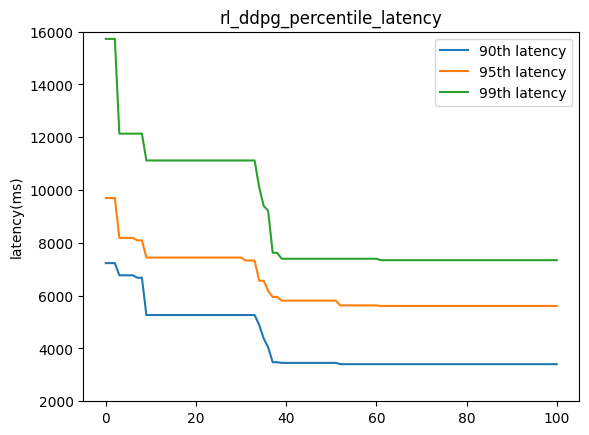

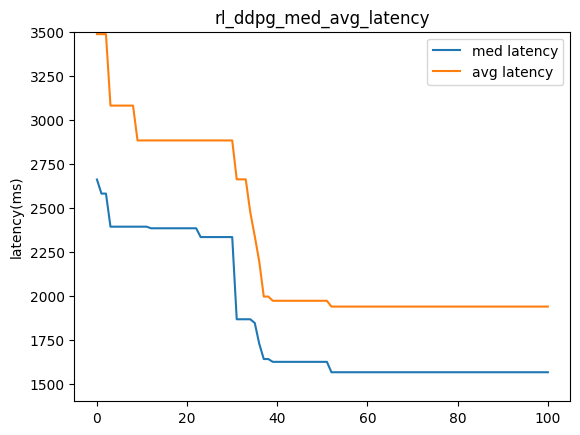

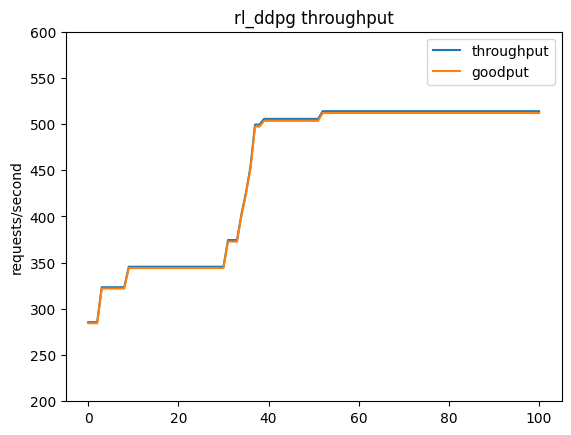

In [65]:
directory2 = f"/home/zhenyu/MLforDB/cybernetics/rl_ddpg/*.summary.json"
plot(directory2,"rl_ddpg")